In [ ]:
# Importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.impute import SimpleImputer
from sklearn.decomposition import NMF

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving ratings.csv to ratings.csv
Saving movies.csv to movies.csv


In [ ]:
#loading the csv files for two datasets
df_m = pd.read_csv('movies.csv')
df_r = pd.read_csv('ratings.csv')

In [ ]:
#Merging the two datasets into one dataset named df
df=pd.merge(df_r, df_m, on='movieId', how='left')

In [ ]:
#Dropping columns timestamp and genres
df=df.drop(['timestamp', 'genres'], axis=1)

In [ ]:
#Setting userid column as index 
df=df.set_index('userId')
df

,movieId,rating,title
userId,,,
1,31,2.5,Dangerous Minds (1995)
1,1029,3.0,Dumbo (1941)
1,1061,3.0,Sleepers (1996)
1,1129,2.0,Escape from New York (1981)
1,1172,4.0,Cinema Paradiso (Nuovo cinema Paradiso) (1989)
...,...,...,...
671,6268,2.5,Raising Victor Vargas (2002)
671,6269,4.0,Stevie (2002)
671,6365,4.0,"Matrix Reloaded, The (2003)"


In [ ]:
#df.to_csv('movie_rating.csv')

In [ ]:
#pwd

'/content'

In [ ]:
#files.download("movie_rating.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Popularity Based Recommendation System**

In [ ]:
#Sorting the movies in descending order, the movies which are highest rated will be shown in first place
df.groupby(['title'])['rating'].mean().sort_values(ascending=False)

title
Ivan Vasilievich: Back to the Future (Ivan Vasilievich menyaet professiyu) (1973)    5.0
Alien Escape (1995)                                                                  5.0
Boiling Point (1993)                                                                 5.0
Bone Tomahawk (2015)                                                                 5.0
Borgman (2013)                                                                       5.0
                                                                                    ... 
Waterloo Bridge (1940)                                                               0.5
Karla (2006)                                                                         0.5
Ring of Terror (1962)                                                                0.5
Road Games (a.k.a. Roadgames) (1981)                                                 0.5
Beastmaster 2: Through the Portal of Time (1991)                                     0.5
Name: rating, L

Alien Escape, Ivan Vasiliviech, Boiling Point those are the movies got rating 5 and thus are ranked in first positions. 

In [ ]:
#Sorting the movies in descending order based on count values, which got highest number of rating, will be placed in first positions
df.groupby(['title'])['rating'].count().sort_values(ascending=False)

title
Forrest Gump (1994)                                   341
Pulp Fiction (1994)                                   324
Shawshank Redemption, The (1994)                      311
Silence of the Lambs, The (1991)                      304
Star Wars: Episode IV - A New Hope (1977)             291
                                                     ... 
Robin Williams: Weapons of Self Destruction (2009)      1
Good German, The (2006)                                 1
Good Earth, The (1937)                                  1
Robot Overlords (2014)                                  1
İtirazım Var (2014)                                     1
Name: rating, Length: 9064, dtype: int64

- For example, Forrest Gump, Pulp Fiction Shawsank Redumption and Silence of the Lambs are the movies which were rated more than three hundred times.

In [ ]:
#Creating a new dataframe ratings_mean_count
ratings_mean_count = pd.DataFrame(df.groupby(['title'])['rating'].mean().sort_values(ascending=False))

In [ ]:
#Creating a new column in new dataframe based on count of the movies
ratings_mean_count['rating_counts'] = pd.DataFrame(df.groupby('title')['rating'].count())

In [ ]:
#the first few columns of the dataframe
ratings_mean_count.head()

,rating,rating_counts
title,,
Ivan Vasilievich: Back to the Future (Ivan Vasilievich menyaet professiyu) (1973),5.0,1
Alien Escape (1995),5.0,1
Boiling Point (1993),5.0,1
Bone Tomahawk (2015),5.0,1
Borgman (2013),5.0,1


# **Cosine Similarity based Recommendation**

In [ ]:
# Taking only two columns in a new dataframe 
df_check=df[['title', 'rating']]
df_check

,title,rating
userId,,
1,Dangerous Minds (1995),2.5
1,Dumbo (1941),3.0
1,Sleepers (1996),3.0
1,Escape from New York (1981),2.0
1,Cinema Paradiso (Nuovo cinema Paradiso) (1989),4.0
...,...,...
671,Raising Victor Vargas (2002),2.5
671,Stevie (2002),4.0
671,"Matrix Reloaded, The (2003)",4.0


In [ ]:
#Creating a dataframe with crosstab function
df_c=pd.crosstab(df_check.index,df_check.title, values = df_check.rating,aggfunc='mean')
df_c

title,"""Great Performances"" Cats (1998)",$9.99 (2008),'Hellboy': The Seeds of Creation (2004),'Neath the Arizona Skies (1934),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),...,Zulu (1964),Zulu (2013),[REC] (2007),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931),İtirazım Var (2014)
row_0,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
669,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Now each movie is in a column against userid 
- therefore, many nan values as all users did not watch all movies, or many of movies

In [ ]:
# Checking a particular movie, and the rating given by the users who has wathced
df[df['title']=='(500) Days of Summer (2009)']

,movieId,rating,title
userId,,,
13,69757,4.0,(500) Days of Summer (2009)
48,69757,4.5,(500) Days of Summer (2009)
69,69757,5.0,(500) Days of Summer (2009)
73,69757,4.5,(500) Days of Summer (2009)
78,69757,4.0,(500) Days of Summer (2009)
81,69757,2.0,(500) Days of Summer (2009)
132,69757,4.5,(500) Days of Summer (2009)
133,69757,4.5,(500) Days of Summer (2009)
149,69757,3.0,(500) Days of Summer (2009)


In [ ]:
#Instantiating imputer with simple imputer and filling the nan values with 2.5
imputer = SimpleImputer(strategy = 'constant', fill_value= 2.5)

In [ ]:
#transforming 
R = imputer.fit_transform(df_c)

In [ ]:
#Checking the values after imputation
R

array([[2.5, 2.5, 2.5, ..., 2.5, 2.5, 2.5],
       [2.5, 2.5, 2.5, ..., 2.5, 2.5, 2.5],
       [2.5, 2.5, 2.5, ..., 2.5, 2.5, 2.5],
       ...,
       [2.5, 2.5, 2.5, ..., 2.5, 2.5, 2.5],
       [2.5, 2.5, 2.5, ..., 2.5, 2.5, 2.5],
       [2.5, 2.5, 2.5, ..., 2.5, 2.5, 2.5]])

In [ ]:
#Applying on cosine similarity on R
cosine_similarity(R)

array([[1.        , 0.9986915 , 0.99911815, ..., 0.99940474, 0.9990107 ,
        0.99731895],
       [0.9986915 , 1.        , 0.99822499, ..., 0.998291  , 0.99816355,
        0.99667667],
       [0.99911815, 0.99822499, 1.        , ..., 0.99886795, 0.99856978,
        0.99721812],
       ...,
       [0.99940474, 0.998291  , 0.99886795, ..., 1.        , 0.99870432,
        0.99718876],
       [0.9990107 , 0.99816355, 0.99856978, ..., 0.99870432, 1.        ,
        0.99716786],
       [0.99731895, 0.99667667, 0.99721812, ..., 0.99718876, 0.99716786,
        1.        ]])

In [ ]:
# creating a dataframe 
cosine_df = pd.DataFrame(cosine_similarity(R), index= df_c.index, columns=df_c.index)
cosine_df

row_0,1,2,3,4,5,6,7,8,9,10,...,662,663,664,665,666,667,668,669,670,671
row_0,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.998691,0.999118,0.992610,0.997870,0.999062,0.998410,0.997383,0.998952,0.998963,...,0.999076,0.999477,0.991671,0.994421,0.999428,0.998675,0.999314,0.999405,0.999011,0.997319
2,0.998691,1.000000,0.998225,0.992015,0.997079,0.998015,0.997854,0.996707,0.998107,0.998000,...,0.998573,0.998482,0.990958,0.993670,0.998693,0.998225,0.998368,0.998291,0.998164,0.996677
3,0.999118,0.998225,1.000000,0.992333,0.997484,0.998469,0.998096,0.997383,0.998509,0.998529,...,0.998687,0.998936,0.991958,0.994328,0.998980,0.998291,0.998870,0.998868,0.998570,0.997218
4,0.992610,0.992015,0.992333,1.000000,0.991523,0.992199,0.993002,0.991747,0.991862,0.992415,...,0.992276,0.992470,0.986356,0.990143,0.992547,0.991902,0.992390,0.992574,0.991949,0.991923
5,0.997870,0.997079,0.997484,0.991523,1.000000,0.997325,0.996795,0.996114,0.997274,0.997194,...,0.997631,0.997657,0.990650,0.993856,0.997685,0.996930,0.997500,0.997584,0.997237,0.996256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,0.998675,0.998225,0.998291,0.991902,0.996930,0.997998,0.997876,0.996572,0.998042,0.997956,...,0.998328,0.998478,0.990941,0.993647,0.998676,1.000000,0.998470,0.998314,0.998120,0.996694
668,0.999314,0.998368,0.998870,0.992390,0.997500,0.998627,0.998156,0.997187,0.998792,0.998649,...,0.998740,0.999120,0.991647,0.994249,0.999138,0.998470,1.000000,0.998942,0.998873,0.997236
669,0.999405,0.998291,0.998868,0.992574,0.997584,0.998704,0.998263,0.997127,0.998614,0.998620,...,0.998708,0.999114,0.991626,0.994279,0.999070,0.998314,0.998942,1.000000,0.998704,0.997189


In [ ]:
#Creating a transposed version
R_t = df_c.T
R_t

row_0,1,2,3,4,5,6,7,8,9,10,...,662,663,664,665,666,667,668,669,670,671
title,,,,,,,,,,,,,,,,,,,,,
"""Great Performances"" Cats (1998)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
$9.99 (2008),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Hellboy': The Seeds of Creation (2004),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Neath the Arizona Skies (1934),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Round Midnight (1986),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
xXx (2002),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
xXx: State of the Union (2005),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
¡Three Amigos! (1986),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# choose an active user
active_user = R_t[3]

In [ ]:
# create a list of unseen movies for this user
unseen_movies = list(R_t.index[R_t[active_user]==nan])
unseen_movies

KeyError: ignored

# **Recommendations with NMF - Non-negative matrix factorization**

Model assumes R~P*Q

In [ ]:
#Instantiating the NMF
model = NMF(n_components=5, max_iter= 500)

In [ ]:
#Fitting the model
model.fit(R)

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  ConvergenceWarning,


NMF(max_iter=500, n_components=5)

In [ ]:
#Creating Q
Q = model.components_
Q

array([[0.79774899, 0.80705517, 0.80216142, ..., 0.75953657, 0.79669071,
        0.80119566],
       [0.14310355, 0.14167907, 0.1444601 , ..., 0.07993282, 0.15618076,
        0.14021904],
       [0.12230091, 0.12067108, 0.11024931, ..., 0.18642001, 0.16052968,
        0.13222835],
       [0.10067182, 0.06136608, 0.08633405, ..., 0.3470392 , 0.07508691,
        0.08129897],
       [0.05896237, 0.05850667, 0.05731721, ..., 0.13041233, 0.05620616,
        0.05868059]])

In [ ]:
#creating a dataframe with five features
Q_df = pd.DataFrame(model.components_, columns=df_c.columns, index=['feature1', 'feature2', 'feature3', 'feature4', 'feature5'])
Q_df

title,"""Great Performances"" Cats (1998)",$9.99 (2008),'Hellboy': The Seeds of Creation (2004),'Neath the Arizona Skies (1934),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),...,Zulu (1964),Zulu (2013),[REC] (2007),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931),İtirazım Var (2014)
feature1,0.797749,0.807055,0.802161,0.796772,0.788780,0.797937,0.799539,0.788951,0.802074,0.759163,...,0.796129,0.804737,0.800609,0.810345,0.798944,0.816686,0.802529,0.759537,0.796691,0.801196
feature2,0.143104,0.141679,0.144460,0.143478,0.218836,0.136055,0.131019,0.086540,0.059906,0.181531,...,0.163305,0.142661,0.135678,0.039240,0.140062,0.108721,0.142536,0.079933,0.156181,0.140219
feature3,0.122301,0.120671,0.110249,0.124212,0.132971,0.132975,0.105638,0.162367,0.054569,0.689106,...,0.117015,0.097787,0.156870,0.105370,0.144848,0.016851,0.085205,0.186420,0.160530,0.132228
feature4,0.100672,0.061366,0.086334,0.103193,0.098838,0.100268,0.094134,0.169189,0.088683,0.085457,...,0.096083,0.083154,0.072363,0.000000,0.083264,0.144008,0.100867,0.347039,0.075087,0.081299
feature5,0.058962,0.058507,0.057317,0.059052,0.038448,0.063109,0.078318,0.098503,0.168110,0.012628,...,0.066665,0.055657,0.059656,0.192657,0.062152,0.038191,0.059882,0.130412,0.056206,0.058681


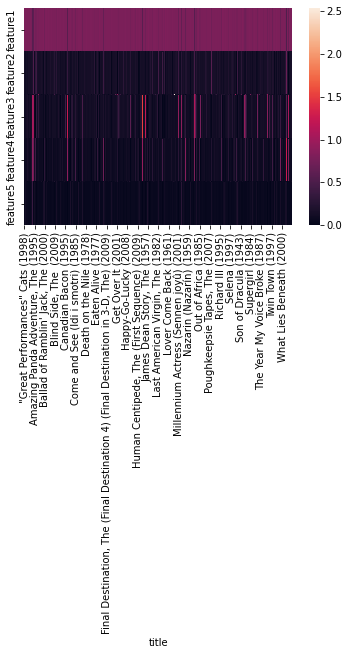

In [ ]:
#heatmap 
sns.heatmap(Q_df)

In [ ]:
#creating P
P = model.transform(R)
P

array([[2.95264574, 0.39639671, 0.24542767, 0.30380906, 0.39536888],
       [2.95217827, 0.33868131, 0.14790834, 0.57700009, 0.34386343],
       [2.92686755, 0.37342857, 0.35833138, 0.37229742, 0.43285999],
       ...,
       [2.92483934, 0.40881043, 0.28718781, 0.31842867, 0.60435757],
       [2.91396725, 0.45574256, 0.28440648, 0.39190791, 0.49917552],
       [2.81957313, 0.4864098 , 0.54660125, 0.61312045, 0.65139951]])

In [ ]:
#Creating a dataframe with p values
P_df = pd.DataFrame(P, columns=['feature1', 'feature2', 'feature3', 'feature4', 'feature5'], index=df_c.index)
P_df

,feature1,feature2,feature3,feature4,feature5
row_0,,,,,
1,2.952646,0.396397,0.245428,0.303809,0.395369
2,2.952178,0.338681,0.147908,0.577000,0.343863
3,2.926868,0.373429,0.358331,0.372297,0.432860
4,2.684146,0.415119,0.297348,0.857164,2.768130
5,2.935395,0.386458,0.298786,0.629782,0.074113
...,...,...,...,...,...
667,2.928249,0.431801,0.185935,0.454959,0.555494
668,2.903674,0.525487,0.298665,0.303517,0.569226
669,2.924839,0.408810,0.287188,0.318429,0.604358


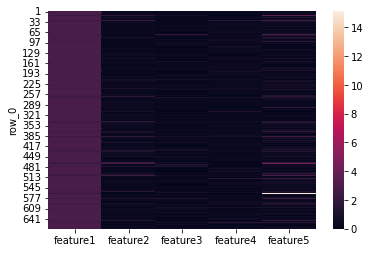

In [ ]:
sns.heatmap(P_df)

In [ ]:
#Calculating model reconstruction error
model.reconstruction_err_

410.21246150541145

In [ ]:
#Reconstruction of predicted R
R = pd.DataFrame(np.dot(P, Q).round(), index=df_c.index, columns=df_c.columns)
R

title,"""Great Performances"" Cats (1998)",$9.99 (2008),'Hellboy': The Seeds of Creation (2004),'Neath the Arizona Skies (1934),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),...,Zulu (1964),Zulu (2013),[REC] (2007),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931),İtirazım Var (2014)
row_0,,,,,,,,,,,,,,,,,,,,,
1,2.0,3.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,...,2.0,3.0,3.0,3.0,2.0,3.0,3.0,2.0,2.0,3.0
2,3.0,3.0,3.0,2.0,2.0,3.0,3.0,3.0,3.0,2.0,...,3.0,3.0,2.0,2.0,2.0,3.0,3.0,3.0,2.0,2.0
3,2.0,3.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,3.0,...,2.0,2.0,3.0,3.0,3.0,3.0,2.0,3.0,2.0,3.0
4,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,3.0,2.0,...,3.0,2.0,2.0,3.0,2.0,2.0,2.0,3.0,2.0,2.0
5,3.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0,2.0,3.0,...,3.0,3.0,2.0,2.0,2.0,3.0,3.0,3.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,2.0,3.0,3.0,2.0,2.0,3.0,3.0,3.0,3.0,2.0,...,3.0,3.0,2.0,3.0,2.0,3.0,3.0,3.0,2.0,3.0
668,2.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,...,2.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0
669,2.0,3.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,3.0,...,2.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,3.0


#### Get new ratings

In [ ]:
user = df.loc[df.index==3].values

In [ ]:
user

array([[60, 3.0, 'Indian in the Cupboard, The (1995)'],
       [110, 4.0, 'Braveheart (1995)'],
       [247, 3.5, 'Heavenly Creatures (1994)'],
       [267, 3.0, 'Major Payne (1995)'],
       [296, 4.5, 'Pulp Fiction (1994)'],
       [318, 5.0, 'Shawshank Redemption, The (1994)'],
       [355, 2.5, 'Flintstones, The (1994)'],
       [356, 5.0, 'Forrest Gump (1994)'],
       [377, 2.5, 'Speed (1994)'],
       [527, 3.0, "Schindler's List (1993)"],
       [588, 3.0, 'Aladdin (1992)'],
       [592, 3.0, 'Batman (1989)'],
       [593, 3.0, 'Silence of the Lambs, The (1991)'],
       [595, 2.0, 'Beauty and the Beast (1991)'],
       [736, 3.5, 'Twister (1996)'],
       [778, 4.0, 'Trainspotting (1996)'],
       [866, 3.0, 'Bound (1996)'],
       [1197, 5.0, 'Princess Bride, The (1987)'],
       [1210, 3.0, 'Star Wars: Episode VI - Return of the Jedi (1983)'],
       [1235, 4.0, 'Harold and Maude (1971)'],
       [1271, 3.0, 'Fried Green Tomatoes (1991)'],
       [1378, 4.0, 'Young Guns (198

#### Impute

Movie Recommendation using KNN

In [ ]:


if not df[df.duplicated(['userId','title'])].empty:
    df = df.drop_duplicates(['userId','title'])

In [ ]:
df_for_knn = df.pivot(index='title',columns='userId',values='rating').fillna(0)

In [ ]:
df_for_knn.head()

userId,1,2,3,4,5,6,7,8,9,10,...,662,663,664,665,666,667,668,669,670,671
title,,,,,,,,,,,,,,,,,,,,,
"""Great Performances"" Cats (1998)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
$9.99 (2008),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Hellboy': The Seeds of Creation (2004),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Neath the Arizona Skies (1934),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Round Midnight (1986),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from scipy.sparse import csr_matrix

In [ ]:
df_for_knn_sparse = csr_matrix(df_for_knn.values)

In [ ]:
from sklearn.neighbors import NearestNeighbors



In [ ]:
model_knn = NearestNeighbors(metric='cosine',algorithm='brute')

In [ ]:
model_knn.fit(df_for_knn_sparse)

NearestNeighbors(algorithm='brute', metric='cosine')

In [ ]:
query_index = np.random.choice(df_for_knn.shape[0])

In [ ]:
distances, indices = model_knn.kneighbors(df_for_knn.loc['burbs, The (1989)].values.reshape(1,-1),n_neighbors=6)

SyntaxError: ignored

In [ ]:
def encode_units(x):
    if x<=0:
        return 0
    if x>=1:
        return 1

In [ ]:
df_for_ar = df_for_knn.T.applymap(encode_units)

In [ ]:
df_for_ar.head()

title,"""Great Performances"" Cats (1998)",$9.99 (2008),'Hellboy': The Seeds of Creation (2004),'Neath the Arizona Skies (1934),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),...,Zulu (1964),Zulu (2013),[REC] (2007),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931),İtirazım Var (2014)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0,0,0.0,0.0,0,0.0,0,0,0.0,...,0,0,0,0,0,0.0,0,0,0,0
2,0.0,0,0,0.0,0.0,0,0.0,0,0,0.0,...,0,0,0,0,0,0.0,0,0,0,0
3,0.0,0,0,0.0,0.0,0,0.0,0,0,0.0,...,0,0,0,0,0,0.0,0,0,0,0
4,0.0,0,0,0.0,0.0,0,0.0,0,0,0.0,...,0,0,0,0,0,0.0,0,0,0,0
5,0.0,0,0,0.0,0.0,0,0.0,0,0,0.0,...,0,0,0,0,0,0.0,0,0,0,0


In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [ ]:
frequent_itemsets = apriori(df_for_ar, min_support=0.07, use_colnames=True)

ValueError: ignored